In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
!pip install mlxtend

In [3]:
data=pd.read_csv('my_movies.csv')
data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [7]:
#Pre-Processing
#As the data is not in transaction formation We are using transaction Encoder
df=pd.get_dummies(data)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [8]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Green Mile, V1_Sixth Sense, V5_LOTR2, LOTR1, ..."
1393,0.1,"(Green Mile, V1_Sixth Sense, V5_LOTR2, LOTR1, ..."
1394,0.1,"(Green Mile, V1_Sixth Sense, V5_LOTR2, V2_LOTR..."
1395,0.1,"(Green Mile, V1_Sixth Sense, V5_LOTR2, LOTR1, ..."


In [9]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules
rules.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(V3_Harry Potter1, Green Mile, Sixth Sense, LO...","(LOTR1, V5_LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33437,"(LOTR2, Sixth Sense, V4_Green Mile)","(LOTR1, V2_LOTR1, V5_LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33415,"(V5_LOTR2, Sixth Sense, Harry Potter1)","(LOTR1, V2_LOTR1, LOTR2, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33416,"(V5_LOTR2, Sixth Sense, V4_Green Mile)","(LOTR1, V2_LOTR1, LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33417,"(V5_LOTR2, LOTR2, Harry Potter1)","(LOTR1, V2_LOTR1, Sixth Sense, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33418,"(V5_LOTR2, LOTR2, V4_Green Mile)","(LOTR1, V2_LOTR1, Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33419,"(V5_LOTR2, Harry Potter1, V4_Green Mile)","(LOTR1, V2_LOTR1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33420,"(LOTR1, V2_LOTR1, Sixth Sense)","(V4_Green Mile, V5_LOTR2, LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33421,"(LOTR1, V2_LOTR1, LOTR2)","(V4_Green Mile, V5_LOTR2, Sixth Sense, Harry P...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33422,"(LOTR1, V2_LOTR1, Harry Potter1)","(LOTR2, V5_LOTR2, Sixth Sense, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [10]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(V3_Harry Potter1, Green Mile, Sixth Sense, LO...","(LOTR1, V5_LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33437,"(LOTR2, Sixth Sense, V4_Green Mile)","(LOTR1, V2_LOTR1, V5_LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33415,"(V5_LOTR2, Sixth Sense, Harry Potter1)","(LOTR1, V2_LOTR1, LOTR2, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33416,"(V5_LOTR2, Sixth Sense, V4_Green Mile)","(LOTR1, V2_LOTR1, LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33417,"(V5_LOTR2, LOTR2, Harry Potter1)","(LOTR1, V2_LOTR1, Sixth Sense, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33418,"(V5_LOTR2, LOTR2, V4_Green Mile)","(LOTR1, V2_LOTR1, Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33419,"(V5_LOTR2, Harry Potter1, V4_Green Mile)","(LOTR1, V2_LOTR1, LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33420,"(LOTR1, V2_LOTR1, Sixth Sense)","(V4_Green Mile, V5_LOTR2, LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
33421,"(LOTR1, V2_LOTR1, LOTR2)","(V4_Green Mile, V5_LOTR2, Sixth Sense, Harry P...",0.1,0.1,0.1,1.0,10.0,0.09,inf
33422,"(LOTR1, V2_LOTR1, Harry Potter1)","(LOTR2, V5_LOTR2, Sixth Sense, V4_Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf


An leverage value of 0 indicates independence. Range will be [-1 1]
A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [11]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
...,...,...,...,...,...,...,...,...,...
64247,(V3_Harry Potter1),"(Green Mile, V1_Sixth Sense, V5_LOTR2, LOTR1, ...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64248,(Sixth Sense),"(Green Mile, V1_Sixth Sense, V5_LOTR2, LOTR1, ...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
64249,(LOTR2),"(Green Mile, V1_Sixth Sense, V5_LOTR2, LOTR1, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(Harry Potter1),"(Green Mile, V1_Sixth Sense, V5_LOTR2, LOTR1, ...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


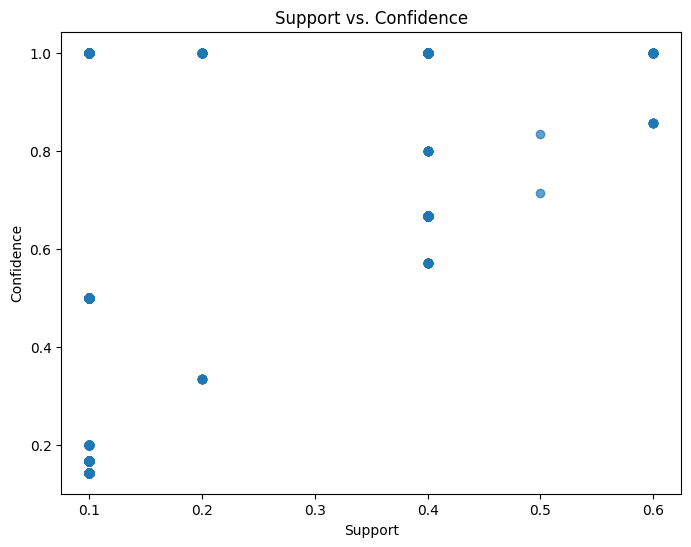

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.7)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.show()

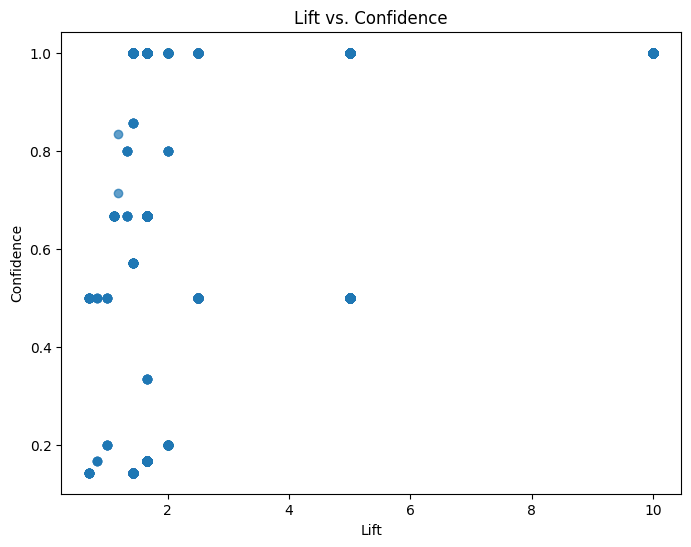

In [13]:
# Scatter plot of lift vs. confidence
plt.figure(figsize=(8, 6))
plt.scatter(rules['lift'], rules['confidence'], alpha=0.7)
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs. Confidence')
plt.show()